# Capítulo: Introdução ao Seaborn

## Visualização Avançada com Seaborn

Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib que foi desenvolvida por Michael Waskom. Ela foi projetada especificamente para visualização de dados estatísticos e oferece:

- Interface de alto nível para criar gráficos complexos com poucas linhas de código

- Temas e paletas de cores atraentes por padrão
    
- Integração perfeita com estruturas de dados do Pandas

- Funções específicas para visualizar relações entre variáveis
    
- Suporte para visualização de modelos estatísticos

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo
sns.set_theme(style="whitegrid")

# Verificar a versão do Seaborn
print(f"Versão do Seaborn: {sns.__version__}")

Versão do Seaborn: 0.13.2


## Estilos e Temas do Seaborn

Uma das vantagens do Seaborn é a melhoria estética imediata que ele traz para as visualizações:

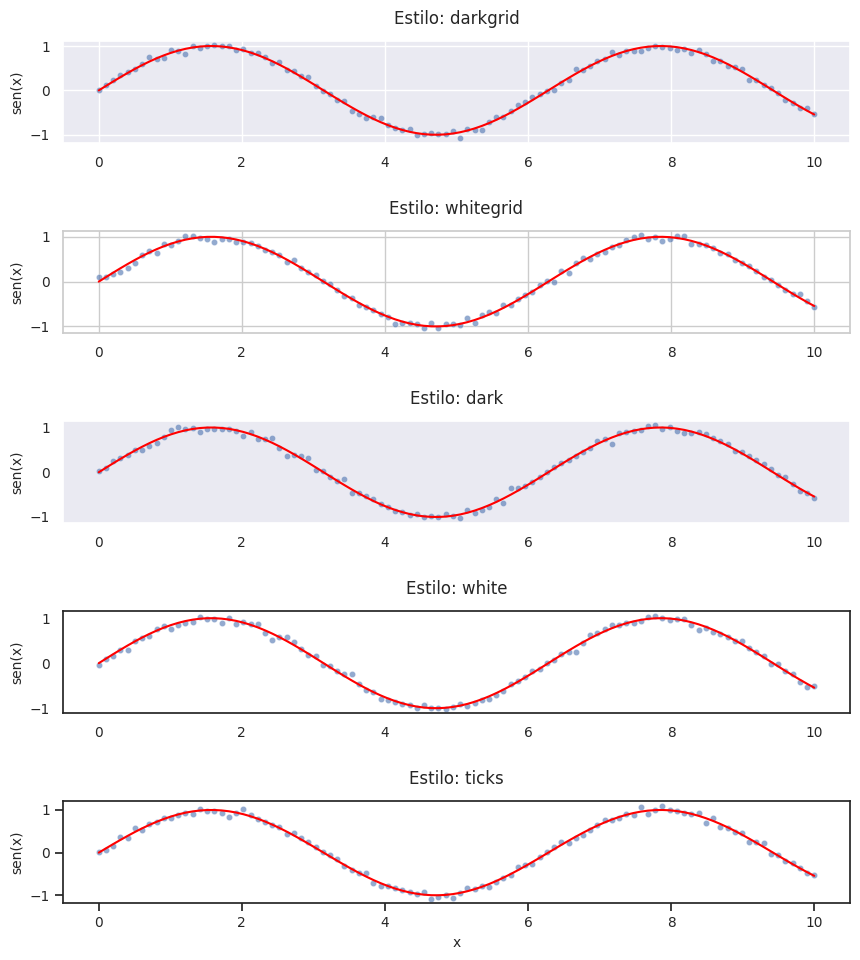

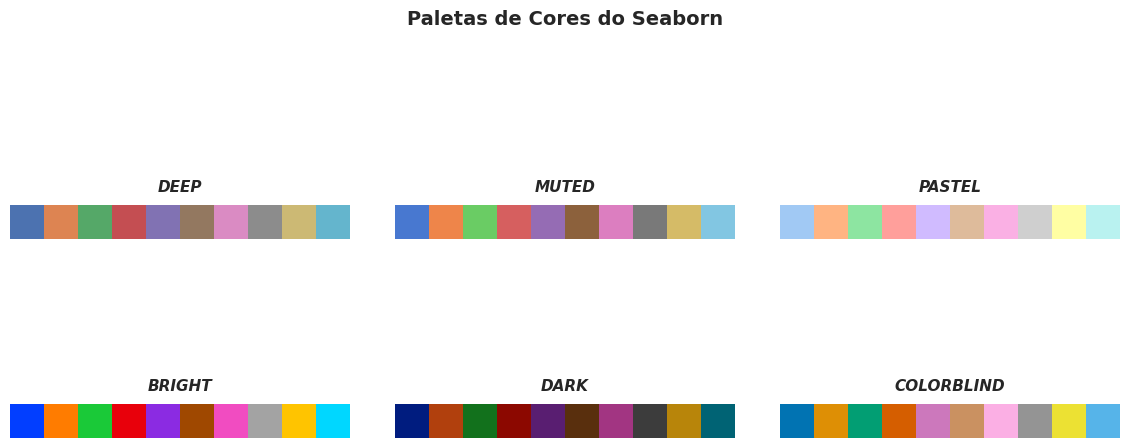

In [21]:
# Configuração geral
sns.set(style="whitegrid", font_scale=0.9)  # Estilo base e tamanho da fonte

# Demonstração dos estilos do Seaborn
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

# Cria figura com proporções
fig = plt.figure(figsize=(9, 10))

for i, style in enumerate(styles, 1):
    with sns.axes_style(style):  # Aplica o estilo ANTES de criar o subplot
        ax = fig.add_subplot(len(styles), 1, i)
        x = np.linspace(0, 10, 100)
        y = np.sin(x) + np.random.normal(0, 0.05, 100)  # Adiciona ruído para visualização

        # Plot com elementos estilizados
        sns.scatterplot(x=x, y=y, s=20, alpha=0.6, ax=ax)
        sns.lineplot(x=x, y=np.sin(x), color='red', linewidth=1.5, ax=ax)

        # Títulos e labels
        ax.set_title(f"Estilo: {style}", fontsize=12, pad=12)
        if i == len(styles):
            ax.set_xlabel("x", fontsize=10)
        else:
            ax.set_xlabel("")
        ax.set_ylabel("sen(x)", fontsize=10)

plt.tight_layout(pad=2.0)  # Aumenta o espaçamento entre subplots
plt.show()

# Paletas de cores
plt.figure(figsize=(12, 6))
paletas = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for i, palette in enumerate(paletas, 1):
    ax = plt.subplot(2, 3, i)

    # Cria uma matriz de índices para representar as cores
    cores = sns.color_palette(palette, n_colors=10)
    gradiente = np.arange(10).reshape(1, -1)  # Matriz 1x10 de índices

    # Plot usando os índices com a paleta como cmap
    sns.heatmap(
        gradiente,
        cmap=sns.color_palette(palette, as_cmap=True),
        ax=ax,
        cbar=False,
        square=True,
        xticklabels=False,
        yticklabels=False
    )

    # Estilização
    ax.set_title(palette.upper(), fontsize=11, pad=10, fontweight='bold', style='italic')
    ax.set_facecolor('white')  # Fundo branco para contraste

plt.tight_layout(pad=3.0)
plt.suptitle("Paletas de Cores do Seaborn", y=1.02, fontsize=14, fontweight='bold')
plt.show()

## Tipos de Gráficos no Seaborn

Seaborn oferece uma variedade de funções para criar diferentes tipos de gráficos. Vamos explorar os principais:

### Gráficos de Dsitribuição

Histograma e KDE (Kernel Density Estimate)

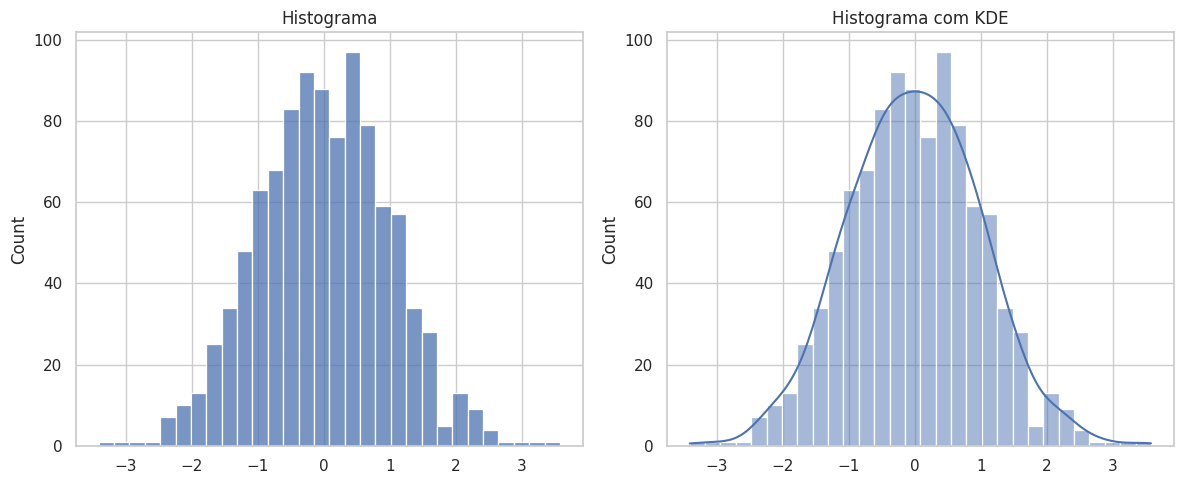

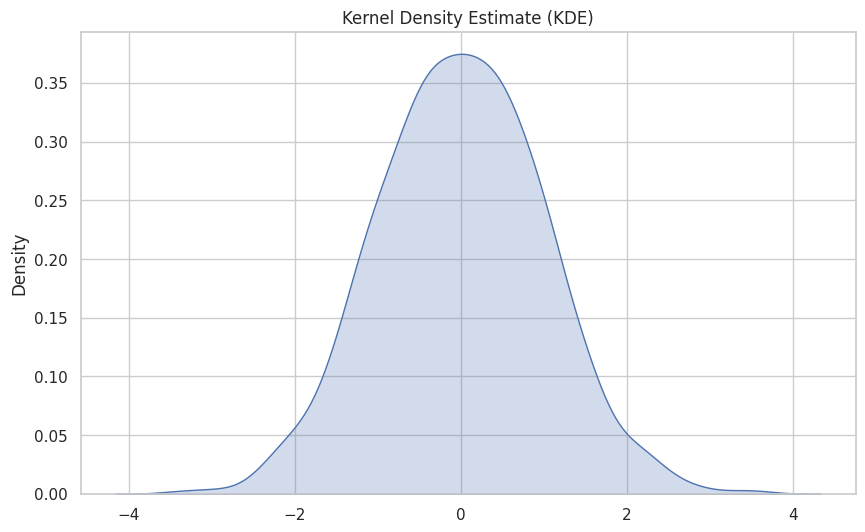

In [3]:
# Gerar dados
data = np.random.normal(0, 1, 1000)

# Histograma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=False, bins=30)
plt.title('Histograma')

plt.subplot(1, 2, 2)
sns.histplot(data, kde=True, bins=30)
plt.title('Histograma com KDE')

plt.tight_layout()
plt.show()

# Apenas KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data, fill=True)
plt.title('Kernel Density Estimate (KDE)')
plt.show()

Gráfico de Distribuição Acumulada

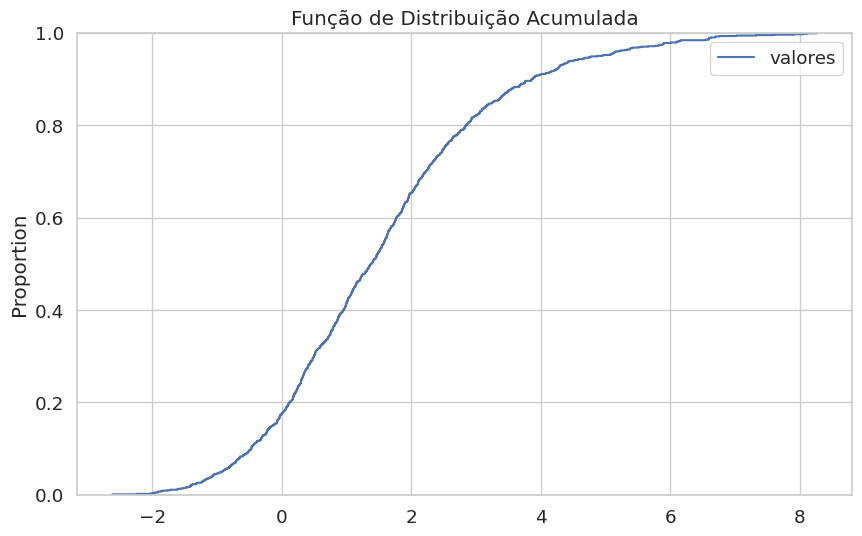

In [17]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data)
plt.title('Função de Distribuição Acumulada')
plt.show()

Boxplot e Violinplot

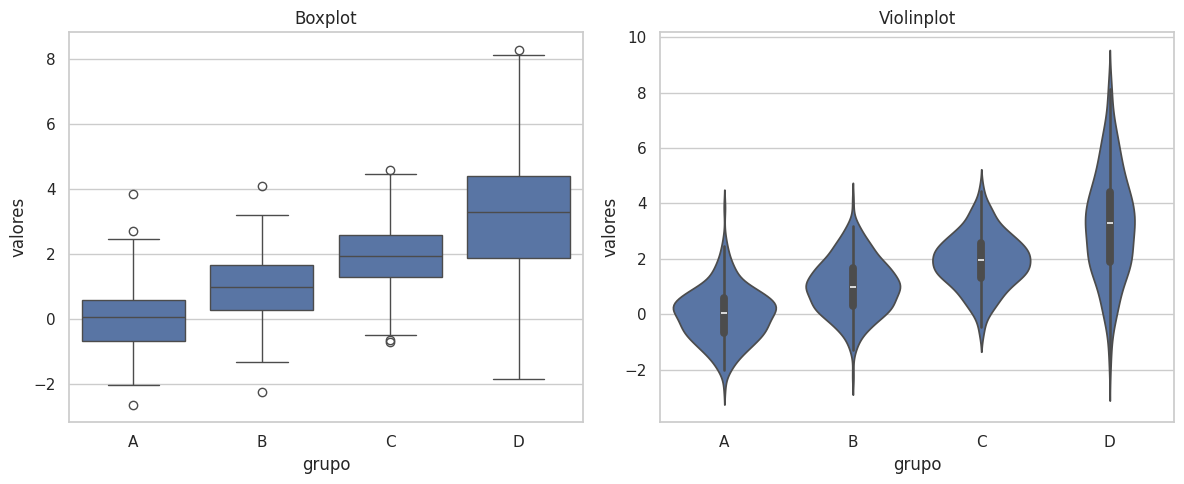

In [5]:
# Gerar dados
np.random.seed(42)
data = pd.DataFrame({
    'grupo': np.repeat(['A', 'B', 'C', 'D'], 250),
    'valores': np.concatenate([
        np.random.normal(0, 1, 250),
        np.random.normal(1, 1, 250),
        np.random.normal(2, 1, 250),
        np.random.normal(3, 2, 250)
    ])
})

# Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='grupo', y='valores', data=data)
plt.title('Boxplot')

plt.subplot(1, 2, 2)
sns.violinplot(x='grupo', y='valores', data=data)
plt.title('Violinplot')

plt.tight_layout()
plt.show()

### Gráficos de Relação

Scatterplot

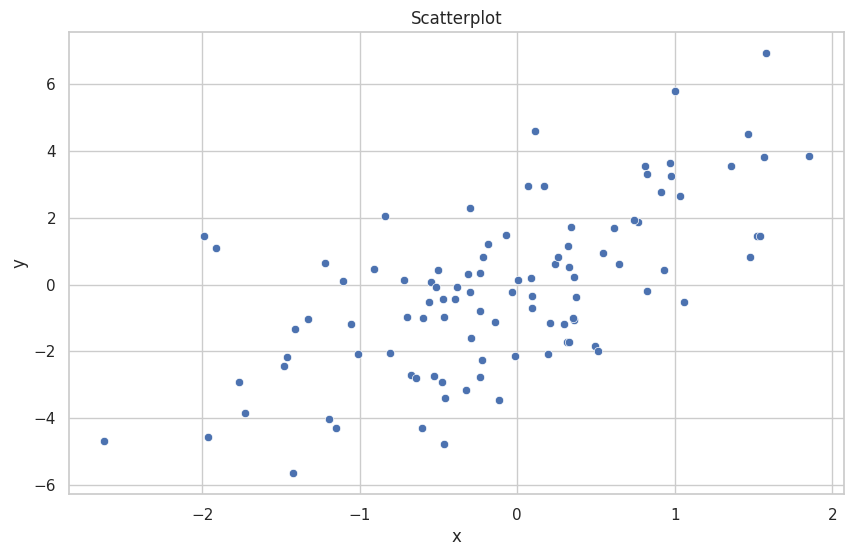

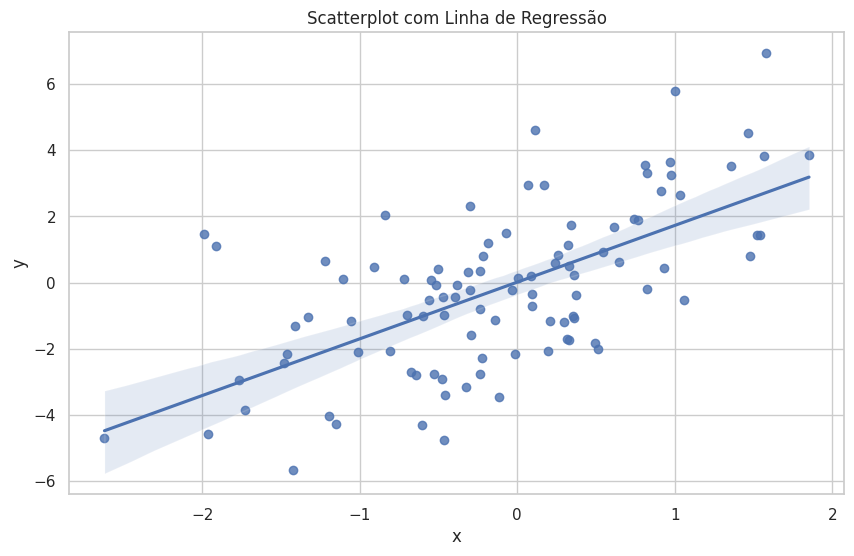

In [6]:
# Gerar dados
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y = x * 2 + np.random.normal(0, 2, n)
df = pd.DataFrame({'x': x, 'y': y})

# Scatterplot simples
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df)
plt.title('Scatterplot')
plt.show()

# Scatterplot com regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='x', y='y', data=df)
plt.title('Scatterplot com Linha de Regressão')
plt.show()

Pairplot

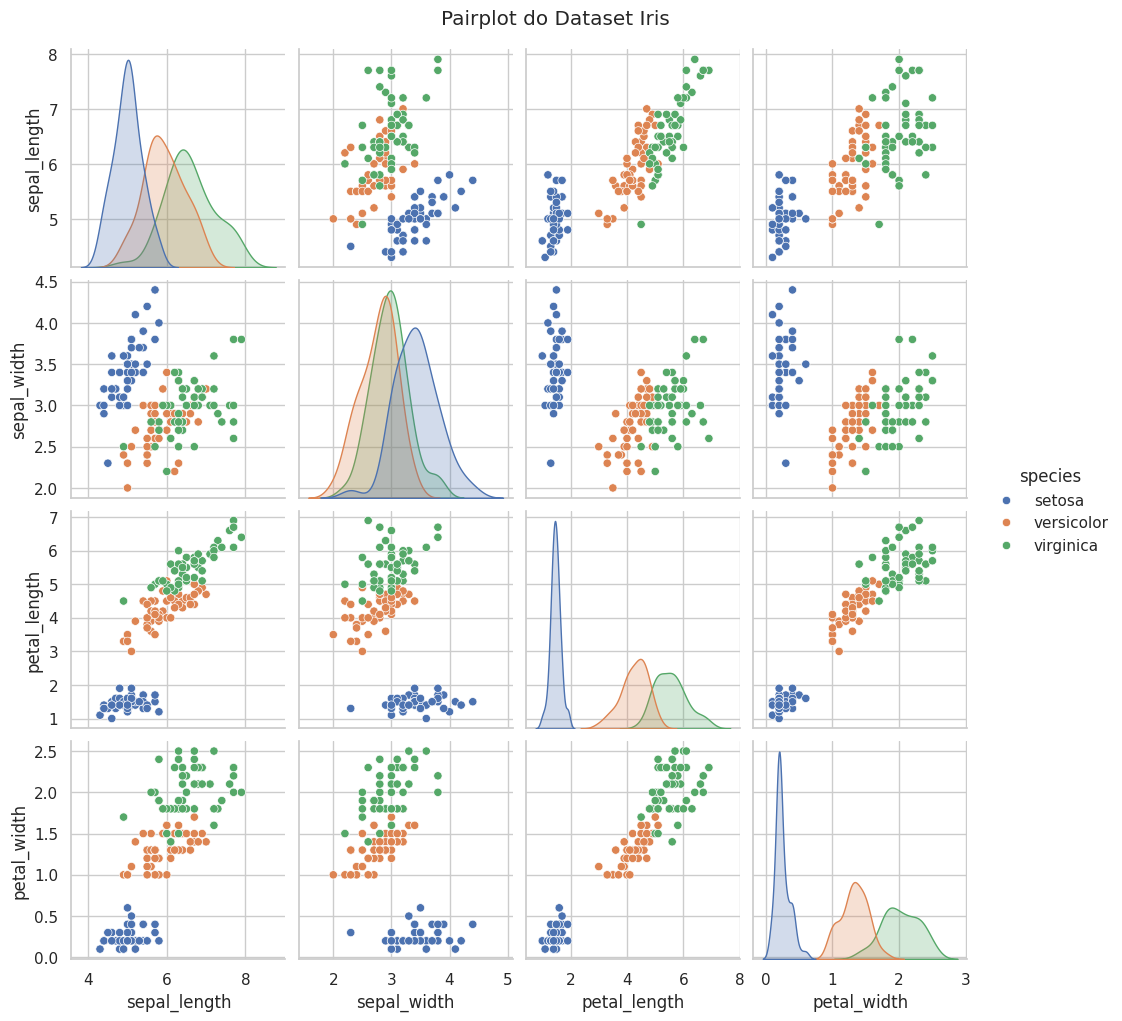

In [7]:
# Usar o dataset iris
iris = sns.load_dataset('iris')

# Pairplot
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pairplot do Dataset Iris', y=1.02)
plt.show()

Heatmap

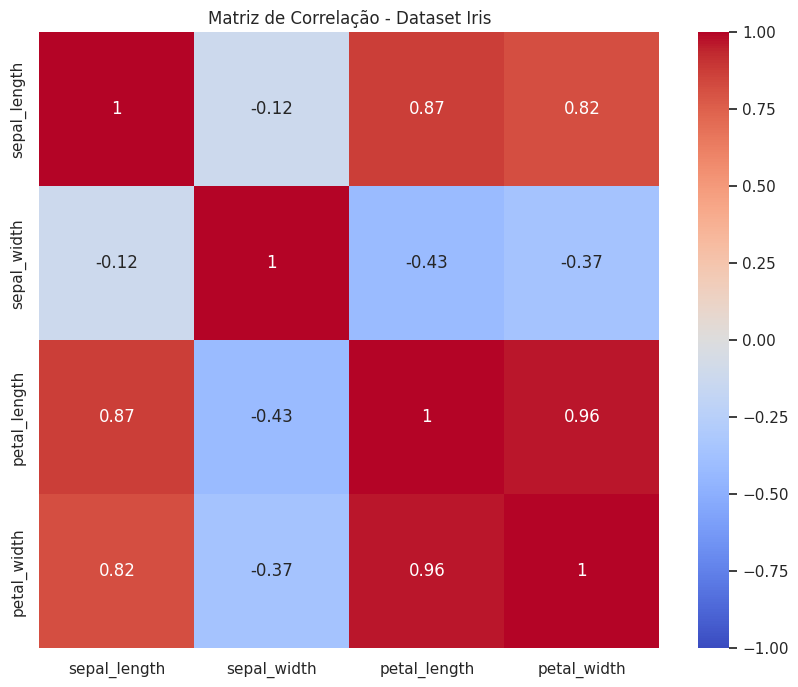

In [8]:
# Matriz de correlação
corr = iris.drop('species', axis=1).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Dataset Iris')
plt.show()

### Gráficos Categóricos

Barplot

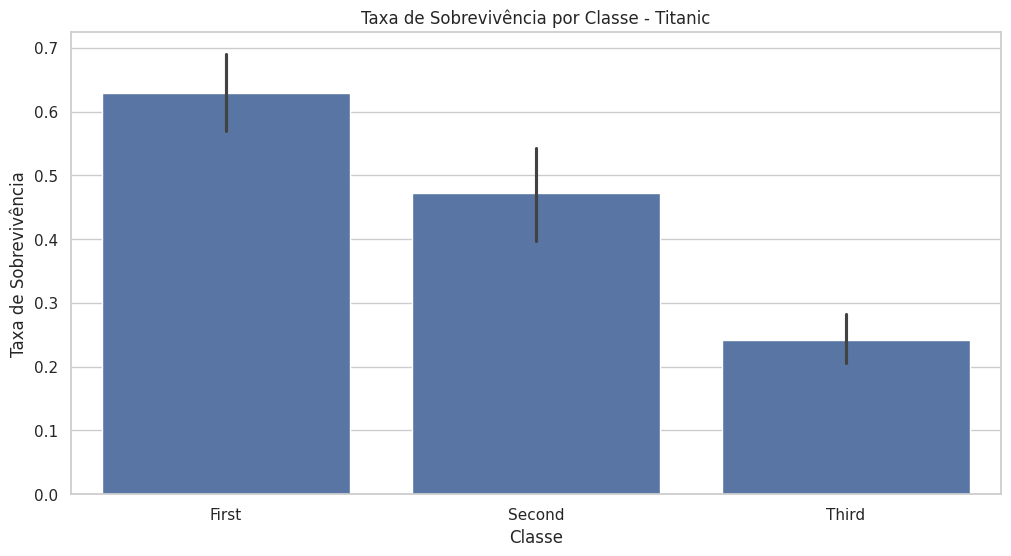

In [9]:
# Dados de exemplo
titanic = sns.load_dataset('titanic')

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Taxa de Sobrevivência por Classe - Titanic')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe')
plt.show()

Countplot

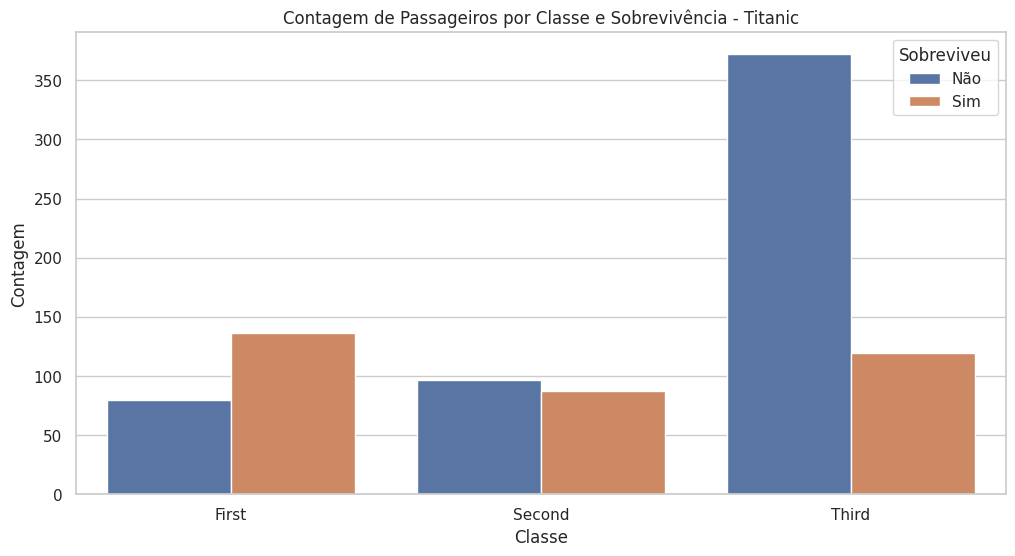

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Contagem de Passageiros por Classe e Sobrevivência - Titanic')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Pointplot

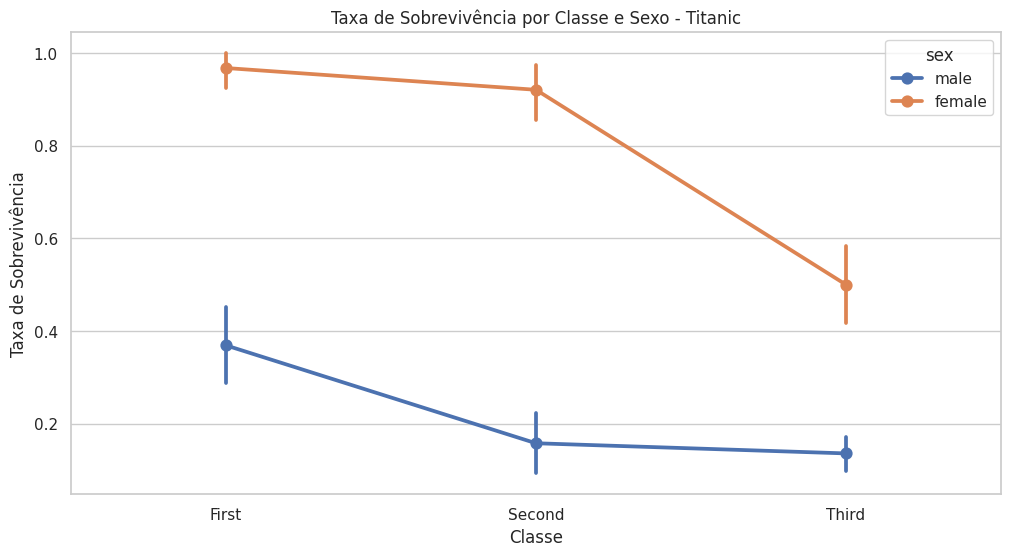

In [11]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='class', y='survived', hue='sex', data=titanic)
plt.title('Taxa de Sobrevivência por Classe e Sexo - Titanic')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe')
plt.show()

### Gráficos de Regressão

Regplot e Lmplot

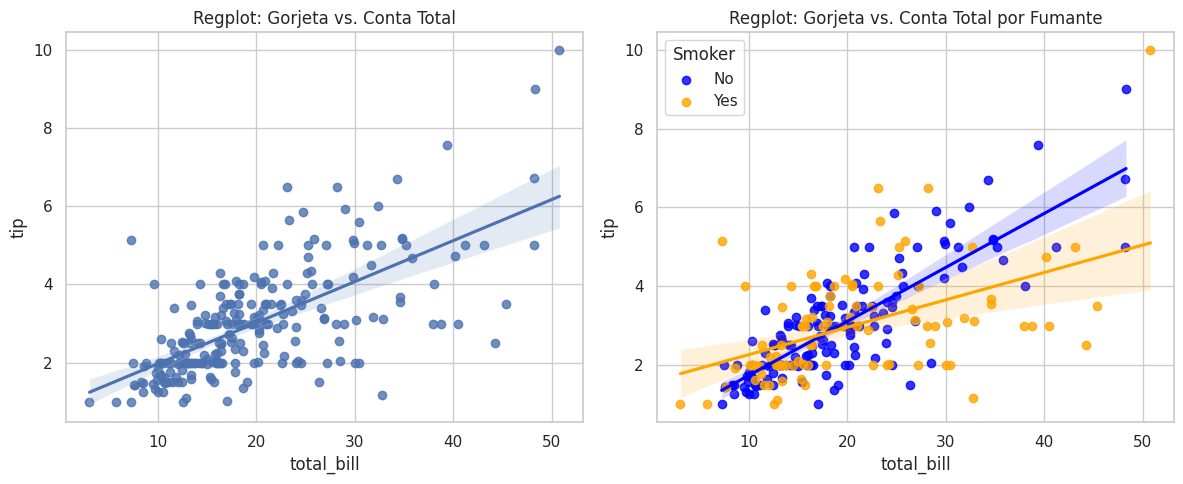

In [14]:
# Dados de exemplo
tips = sns.load_dataset('tips')

# Regplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Regplot: Gorjeta vs. Conta Total')

# Segundo subplot (Regplot com hue manual)
plt.subplot(1, 2, 2)

# Lista de categorias para 'smoker'
hue_groups = tips['smoker'].unique()
colors = ['blue', 'orange']  # Cores para 'No' e 'Yes'

# Plota regressão para cada categoria
for i, group in enumerate(hue_groups):
    subset = tips[tips['smoker'] == group]
    sns.regplot(
        x='total_bill',
        y='tip',
        data=subset,
        color=colors[i],
        label=group
    )

plt.title('Regplot: Gorjeta vs. Conta Total por Fumante')
plt.legend(title='Smoker')

plt.tight_layout()
plt.show()

Residplot

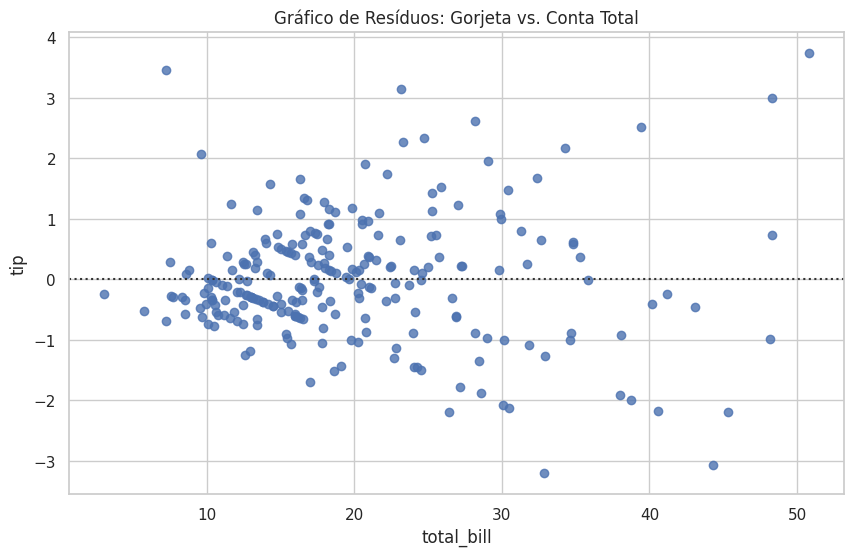

In [13]:
plt.figure(figsize=(10, 6))
sns.residplot(x='total_bill', y='tip', data=tips)
plt.title('Gráfico de Resíduos: Gorjeta vs. Conta Total')
plt.show()

### FacetGrid: Múltiplos Gráficos por Categoria

FacetGrid permite criar múltiplos gráficos separados por categorias:

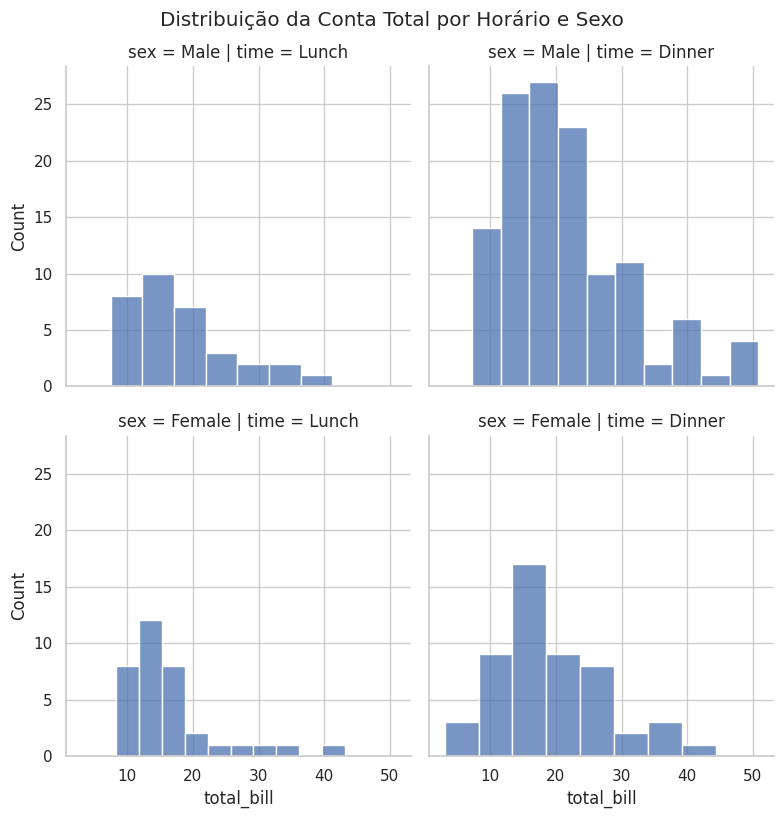

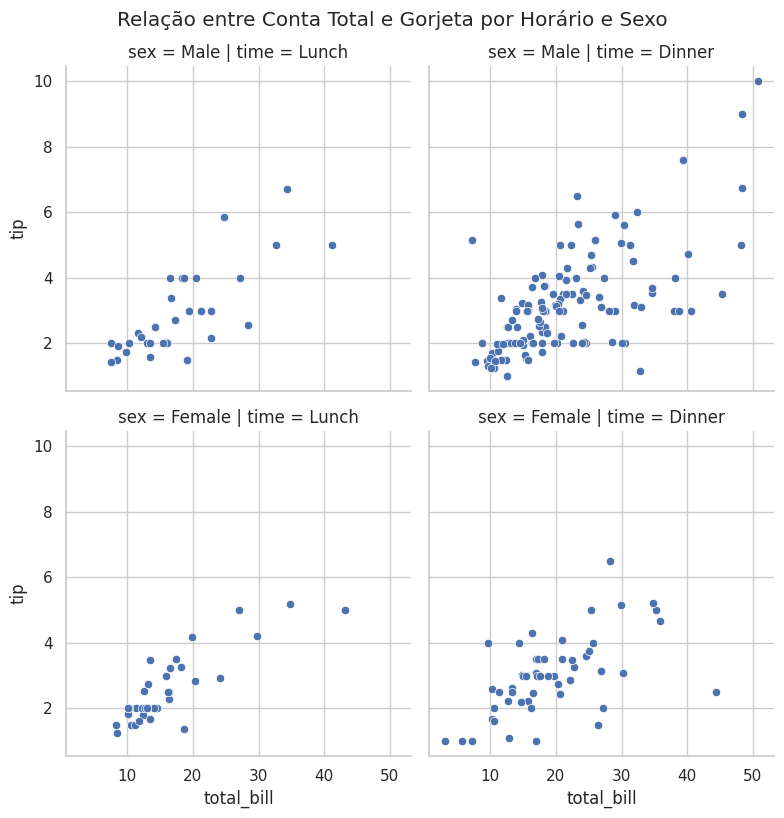

In [15]:
# FacetGrid com histogramas
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map(sns.histplot, "total_bill")
plt.suptitle('Distribuição da Conta Total por Horário e Sexo', y=1.02)
plt.show()

# FacetGrid com scatterplots
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map(sns.scatterplot, "total_bill", "tip")
plt.suptitle('Relação entre Conta Total e Gorjeta por Horário e Sexo', y=1.02)
plt.show()

### Personalização de Gráficos no Seaborn

Seaborn permite personalizar gráficos de várias maneiras:

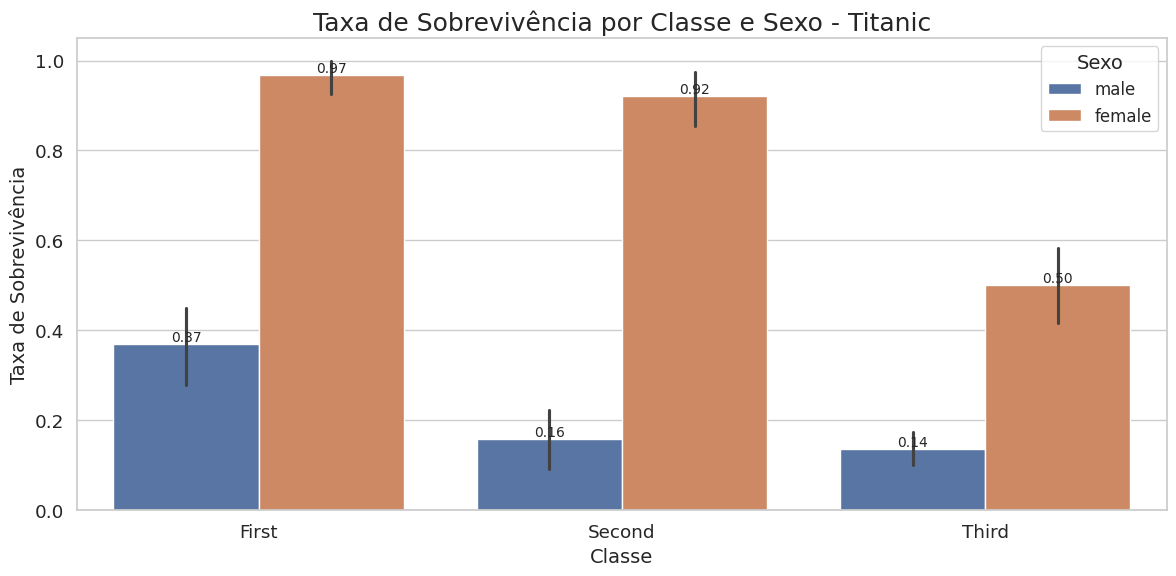

In [16]:
# Configurar o estilo
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

# Criar um gráfico personalizado
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='class', y='survived', hue='sex', data=titanic)

# Personalizar o gráfico
ax.set_title('Taxa de Sobrevivência por Classe e Sexo - Titanic', fontsize=18)
ax.set_xlabel('Classe', fontsize=14)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=14)
ax.legend(title='Sexo', fontsize=12, title_fontsize=14)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()

### Conclusão

Seaborn é uma poderosa biblioteca de visualização que simplifica a criação de gráficos estatísticos atraentes. Ela se baseia no Matplotlib, mas oferece uma interface mais amigável e resultados visualmente mais agradáveis por padrão.

Nos próximos capítulos, exploraremos os conjuntos de dados embutidos no Seaborn e como aplicar diferentes tipos de gráficos para análise de dados demográficos.